In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [3]:
computers_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/computers/computers.csv')
system_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/computers/operating_systems.csv')
invoices_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/computers/invoices.csv')

In [4]:
merge_df = pd.merge(computers_df, invoices_df, on='computer_id')
merge_df = pd.merge(merge_df, system_df, on='os_id', how='left')


In [5]:
merge_df['date'] = pd.to_datetime(merge_df['date'])

print(merge_df)

   computer_id brand  price_x       date  os_id  quantity   title  price_y
0            1  Acer    23000 2023-01-03      2         1   Linux    12000
1            1  Acer    23000 2023-01-01      0         5     NaN        0
2            2  Asus    30000 2023-01-02      2         3   Linux    12000
3            3   MSI    40000 2023-01-02      4         4  Ubuntu     9000
4            3   MSI    40000 2023-01-03      3         2   MacOS    15000


In [6]:
total_coast = (((merge_df['price_x'] + merge_df['price_y'] )* merge_df['quantity'])).sum()
print(f'Загальна вартість = {total_coast:.2f}')

Загальна вартість = 582000.00


In [11]:
mark = merge_df.groupby('brand')['price_x'].sum()
mark


brand
Acer    46000
Asus    30000
MSI     80000
Name: price_x, dtype: int64

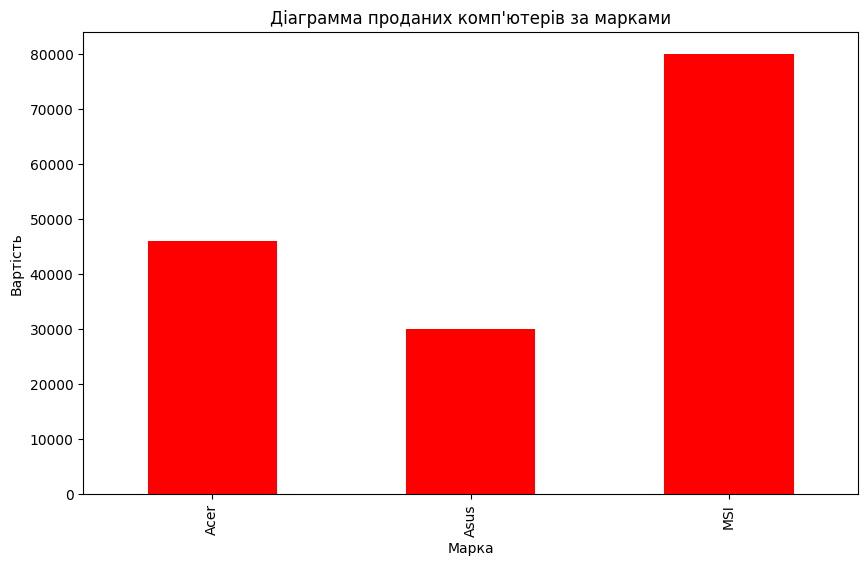

In [8]:
plt.figure(figsize=(10, 6))
mark.plot(kind='bar', color='red')
plt.title('Діаграмма проданих комп\'ютерів за марками')
plt.xlabel('Марка')
plt.ylabel('Вартість')

plt.show()


In [9]:
merge_df['brand'] = merge_df['brand'].fillna('Unknown')

In [10]:
makr_options = list(merge_df['brand'].unique())
mark_dropdown = widgets.Dropdown(options=makr_options, description='Выберите марку:')

output = widgets.Output()

def calculate_total(selected_mark):
    mark_sales = (merge_df[merge_df['brand'] == selected_mark]['price_x'] *
                  merge_df[merge_df['brand'] == selected_mark]['quantity']).sum()
    with output:
        print(f'Сумма для марки {selected_mark}: {mark_sales:.2f}')

widgets.interactive(calculate_total, selected_mark=mark_dropdown)

display(mark_dropdown)
display(output)




Dropdown(description='Выберите марку:', options=('Acer', 'Asus', 'MSI'), value='Acer')

Output()